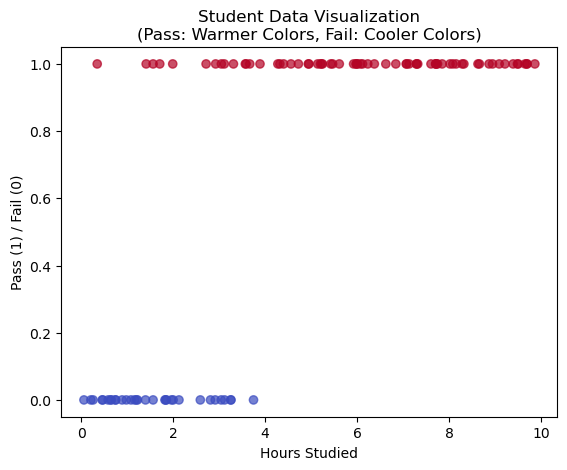

Coefficients: [[1.40365599 1.42846816]]
Intercept: [-4.58136123]
Accuracy: 0.85
ROC AUC Score: 0.8452380952380952
Confusion Matrix:
[[ 5  1]
 [ 2 12]]


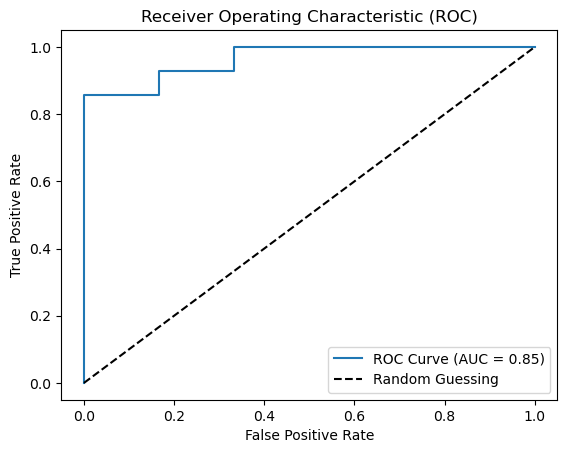

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.read_csv('student_data.csv')

# Visualize the data with better labels and binary color for pass/fail
plt.scatter(data['Hours_Studied'], data['Results'], c=data['Results'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('Student Data Visualization\n(Pass: Warmer Colors, Fail: Cooler Colors)')
plt.show()

# Prepare data for modeling
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get model coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot ROC curve with AUC score
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()



SVM Accuracy: 0.85


C:\Users\patco\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


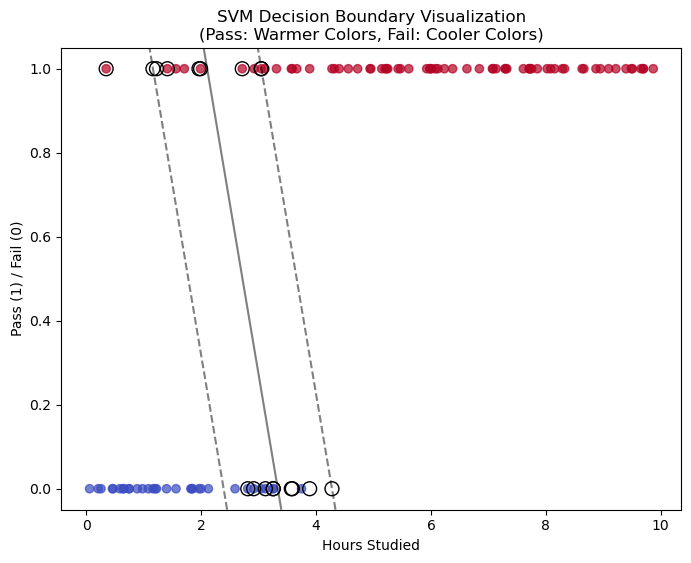

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (Assuming the data is already loaded)

# Prepare data for modeling
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Support Vector Machine with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(data['Hours_Studied'], data['Results'], c=data['Results'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title('SVM Decision Boundary Visualization\n(Pass: Warmer Colors, Fail: Cooler Colors)')
plt.show()



Best Gamma: 1
SVM with RBF Kernel Accuracy: 0.85


C:\Users\patco\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


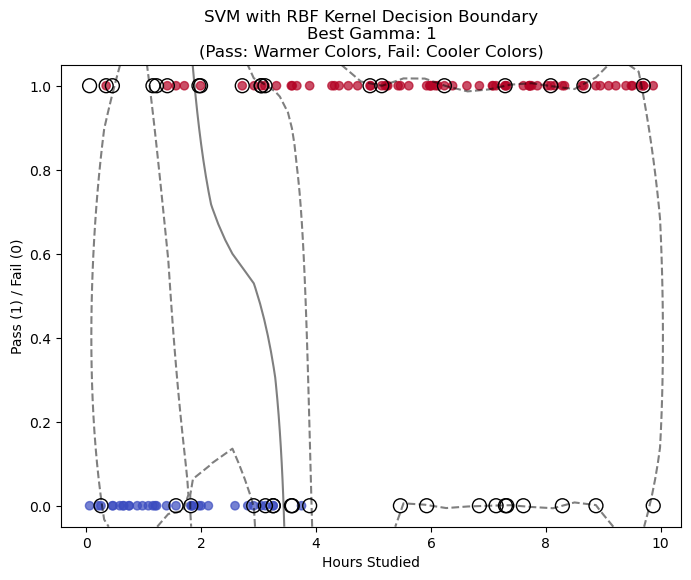

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset (Assuming the data is already loaded)

# Prepare data for modeling
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Grid Search
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Initialize SVM with RBF kernel
svm_model_rbf = SVC(kernel='rbf')

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter
best_gamma = grid_search.best_params_['gamma']

print(f'Best Gamma: {best_gamma}')

# Predict on the test set
y_pred_svm_rbf = grid_search.predict(X_test)

# Calculate accuracy
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f'SVM with RBF Kernel Accuracy: {accuracy_svm_rbf}')

# Visualize the decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(data['Hours_Studied'], data['Results'], c=data['Results'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = grid_search.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(grid_search.best_estimator_.support_vectors_[:, 0], grid_search.best_estimator_.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.title(f'SVM with RBF Kernel Decision Boundary\nBest Gamma: {best_gamma}\n(Pass: Warmer Colors, Fail: Cooler Colors)')
plt.show()

